# Ford GoBike System Data Of The Year 2019
## by Osama Alqahtani

## Preliminary Wrangling


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

# Ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [5]:
# Storing all data CSVs files into (files)
files = ['Data/201901-fordgobike-tripdata.csv',
         'Data/201902-fordgobike-tripdata.csv',
         'Data/201903-fordgobike-tripdata.csv',
         'Data/201904-fordgobike-tripdata.csv',
         'Data/201905-baywheels-tripdata.csv',
         'Data/201906-baywheels-tripdata.csv',
         'Data/201907-baywheels-tripdata.csv',
         'Data/201908-baywheels-tripdata.csv',
         'Data/201909-baywheels-tripdata.csv',
         'Data/201910-baywheels-tripdata.csv',
         'Data/201911-baywheels-tripdata.csv',
         'Data/201912-baywheels-tripdata.csv']

In [6]:
# Merging all data frames in one data frame
df = pd.concat([pd.read_csv(f,) for f in glob.glob("Data" + "/*.csv")],ignore_index=True)

In [5]:
# Printing the first 5 rows to see how the data frame looks
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,1989.0,Male,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,1989.0,Male,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,1965.0,Female,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,1974.0,Male,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,NaN,NaN,No,NaN


In [6]:
# Printing the number of rows and columns in the data frame
df.shape

(2506983, 17)

In [7]:
# Printing the number of duplicated rows to see if it needs cleaning
df.duplicated().sum()

0

In [8]:
# Printing the number of bikes in the data frame
df.bike_id.nunique()

11070

**I will make a copy of the data frame to clean it**

In [9]:
# Making a copy of the data frame to start wrnagling it in the way it benefits the analysis
df_copy = df.copy()
# Making sure that the data had been copied correctly
df_copy.shape

(2506983, 17)

In [10]:
# Dropping unuseful columns and checking the change has been done
df_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male,No,NaN


### What is the structure of your dataset?

> There are 1070 bikes in this dataset with 2,506,983 rows and 12 features as follow:<ul>
    <li>
        Trip Duration (seconds)
    </li>
    <li>
        Start Time and Date
    </li>
    <li>
        End Time and Date
    </li>
    <li>
        Start Station Name
    </li>
    <li>
        End Station Name
    </li>
    <li>
        Bike ID
    </li>
    <li>
         User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    </li>
    <li>
        Member Birth Year
    </li>
    <li>
        Member Gender
    </li>
    <li>
        Bike share for all trip
    </li>
    <li>
        Rental Access Method
    </li>
</ul>

### What is/are the main feature(s) of interest in your dataset?

> Average trip times , Monthly bike ride trend by average trip times, and Average trip times by gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration_sec column will help me in average trip time.<br>
> Start_time and end_time columns will help me in monthly bike ride trends.<br>
> Member_gender will help me in the gender average trip times.

## Univariate Exploration


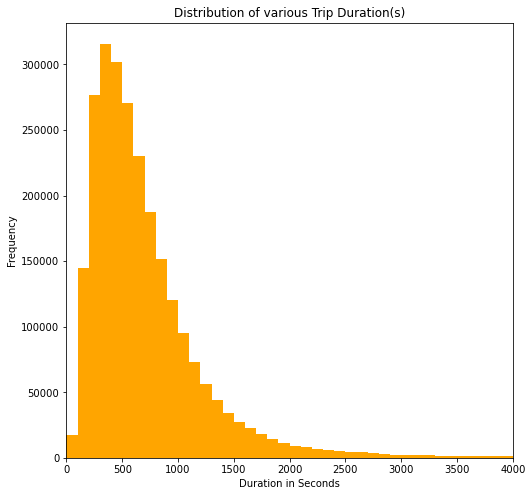

In [40]:
plt.figure(figsize = [8,8])
binedges = np.arange(0, df_copy['duration_sec'].max() + 100 , 100)
plt.hist(data = df_copy , x = 'duration_sec' , bins = binedges, color='orange')
plt.xlim(0,4000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

**There's 300,000+ bike trip with an average majority of 300 sec, for a better understanding of the graph I'm going to convert the seconds to minutes.**

In [12]:
df_copy['duration_min'] = df_copy['duration_sec'] / 60

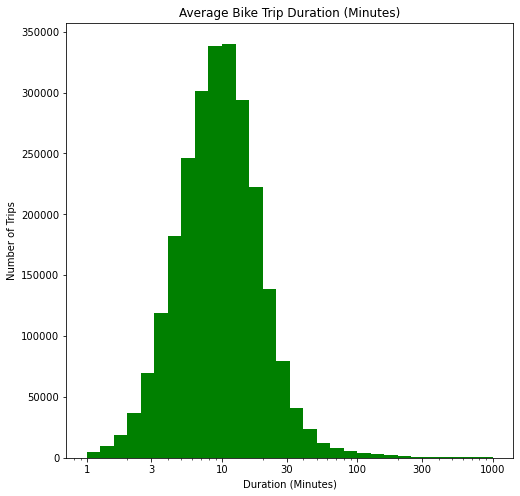

In [41]:
plt.figure(figsize = [8,8])
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins, color='green');
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

**As we can see here the  average time for the majority of trips is approximately 10 minutes which wasn't the case in the previous graph because 300 seconds isn't 10 minutes.**

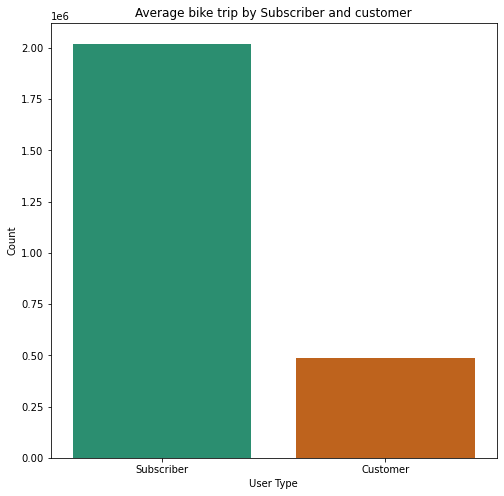

In [45]:
plt.figure(figsize = [8,8])
sns.countplot(data=df_copy,x='user_type', palette="Dark2")
plt.title('Average bike trip by Subscriber and customer');
plt.xlabel("User Type")
plt.ylabel("Count");

**Here we see that Subscribers are more than customers in the average bike trips.**

In [15]:
# Making new column that contains the starting month of the trip
df_copy['month'] = pd.DatetimeIndex(df_copy['start_time']).month
df_copy.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method,duration_min,month
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male,No,NaN,1347.083333,1
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,Cyril Magnin St at Ellis St,Valencia St at 24th St,5506,Subscriber,1989.0,Male,No,NaN,1098.333333,1
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,Downtown Berkeley BART,65th St at Hollis St,2717,Customer,1965.0,Female,No,NaN,1043.883333,1
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,Church St at Duboce Ave,Grove St at Divisadero,4557,Customer,1974.0,Male,No,NaN,744.666667,1
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,Steuart St at Market St,The Embarcadero at Bryant St,2100,Customer,NaN,NaN,No,NaN,1011.816667,1


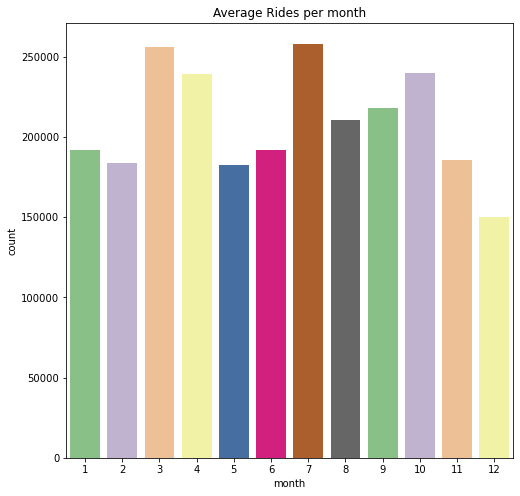

In [49]:
plt.figure(figsize = [8,8])
sns.countplot(data=df_copy,x='month', color=sns.color_palette()[0], palette="Accent")
plt.title('Average Rides per month');

**Here we can see that March, April, July, and October has the most average trips of all months.**

## Bivariate Exploration

> Here I'm analyzing the relation  between the months and the average trip time in minutes.

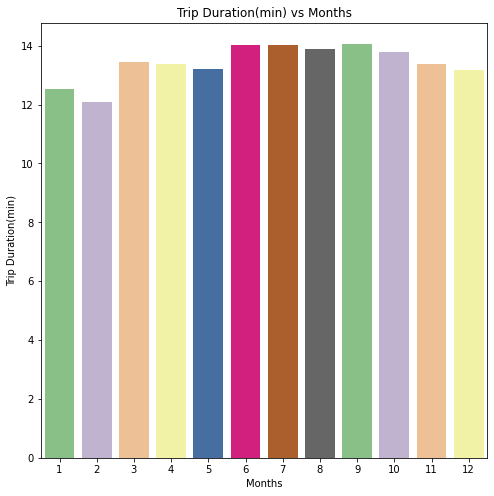

In [63]:
plt.figure(figsize = [8,8])
sns.barplot(data=df_copy,x='month',y='duration_min', color=sns.color_palette()[0], palette="Accent", ci=None)
plt.xlabel('Months')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Months');

**As we can see here that all of the months has an average trip time between 12 and 14 minutes.**

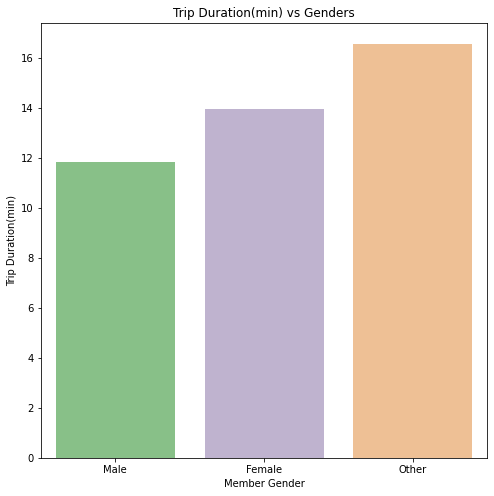

In [68]:
plt.figure(figsize = [8,8])
sns.barplot(data=df_copy,x='member_gender',y='duration_min', color=sns.color_palette()[0], palette="Accent", ci=None)
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Genders');

**As we can see here Females has more average trip duration than Males.**



> From the first graph, we have seen that summer and winter months don't affect the trip duration, So we can say that weather doesn't affect the trip duration.



> In the second graph, we have seen that the most gender with trip duration is female (since we don't know what 'other' genders are I'm going to compare these two), So next, I'm investigating the relationship between gender, age, and trip duration to see if the age has a rule in this.

## Multivariate Exploration

> Investigating the relationship between gender, age, and trip duration.

In [36]:
# Adding new column for members age
df_copy['member_age'] = 2020-df_copy['member_birth_year']

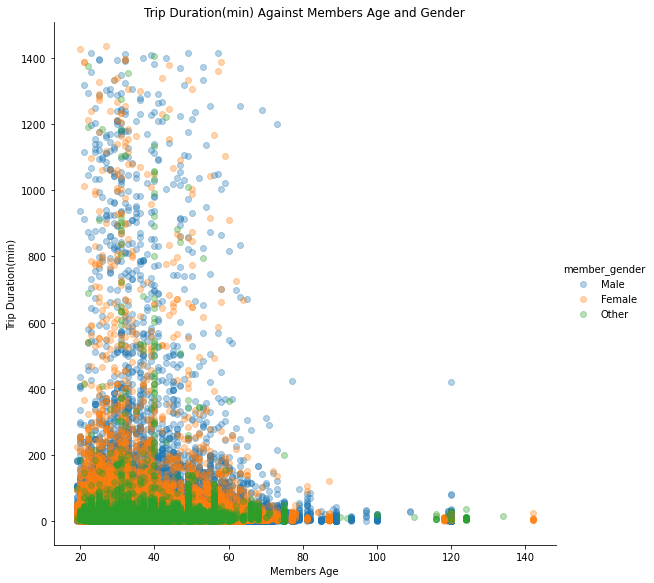

In [38]:
g = sns.FacetGrid(data =  df_copy, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'member_age','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Members Age and Gender')
plt.xlabel('Members Age')
plt.ylabel('Trip Duration(min)');

> As we can see here members age doesn't affect the trip duration for females it's just that females members are more than male members.